Image Data Set :

MAGENET

AR10

MNIST Digits

MNIST Fashion


or
in Kaggle

In [1]:
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.datasets import cifar10
#keras.model
from keras.models import Sequential
from keras.models import load_model
#keras.layers
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.layers import BatchNormalization
#sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder
#keras.callbacks
from keras.callbacks import EarlyStopping
#sklearn.metrics
from sklearn.metrics import confusion_matrix

In [41]:
import pandas as pd
import numpy as np

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [3]:
#load data. x is image and y is label
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [4]:
#shape . (number of image , pixcel size , pixcel size , channels)
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
#shape
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

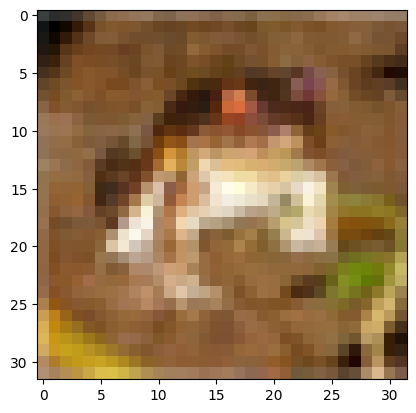

In [10]:
plt.imshow(x_train[0])


In [11]:
#y_train
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
#Normalize the inputs : 0 _ 255 -> 0 _ 1
x_train_floated = x_train.astype('float32')
x_test_floated = x_test.astype('float')
x_train_norm = x_train_floated / 255.0
x_test_norm = x_test_floated / 255.0

In [13]:
#label
y_train[0]

array([6], dtype=uint8)

In [6]:
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [15]:
y_train_onehot[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [9]:
num_class = y_train_onehot.shape[1]
num_class

10

## Model

Sequential


In [7]:
model = Sequential()

In [10]:
model = Sequential()
#32 filters with dimensions of 3 by 3
model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train_norm.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
#64 filters with dimensions of 3 by 3
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(num_class, activation = 'softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 64)       

## Training the model

<html><img src="https://www.google.com/url?sa=i&url=https%3A%2F%2Flabelyourdata.com%2Farticles%2Fmachine-learning-and-training-data&psig=AOvVaw1zCH_29hclsEdTmBEDSEC7&ust=1693128319357000&source=images&cd=vfe&opi=89978449&ved=0CBAQjRxqFwoTCNjs2NKA-oADFQAAAAAdAAAAABAJ" alt="Image"></html>

In [32]:
# Verify the input data shapes
print(x_train_norm.shape)
print(y_train_onehot.shape)
print(x_test_norm.shape)
print(y_test_onehot.shape)


(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


epoch : I will give it a few rounds of practice
batch_size : Give a few to the model

In [13]:
result = model.fit(x_train_norm, y_train_onehot, validation_data =(x_test_norm, y_test_onehot ), epochs= 30 ,batch_size = 64)

Epoch 1/30
782/782 [==============================] - 26s 14ms/step - loss: 1.5214 - accuracy: 0.4540 - val_loss: 1.1151 - val_accuracy: 0.6028
Epoch 2/30
782/782 [==============================] - 11s 15ms/step - loss: 1.0817 - accuracy: 0.6186 - val_loss: 0.9374 - val_accuracy: 0.6703
Epoch 3/30
782/782 [==============================] - 11s 14ms/step - loss: 0.9245 - accuracy: 0.6762 - val_loss: 0.9145 - val_accuracy: 0.6743
Epoch 4/30
782/782 [==============================] - 10s 12ms/step - loss: 0.8311 - accuracy: 0.7106 - val_loss: 0.7943 - val_accuracy: 0.7222
Epoch 5/30
782/782 [==============================] - 10s 12ms/step - loss: 0.7640 - accuracy: 0.7356 - val_loss: 0.8196 - val_accuracy: 0.7127
Epoch 6/30
782/782 [==============================] - 10s 13ms/step - loss: 0.7140 - accuracy: 0.7522 - val_loss: 0.6275 - val_accuracy: 0.7796
Epoch 7/30
782/782 [==============================] - 10s 13ms/step - loss: 0.6768 - accuracy: 0.7660 - val_loss: 0.6187 - val_accuracy:

In [15]:
result.history

{'loss': [1.5213665962219238,
  1.0817012786865234,
  0.9245383739471436,
  0.8311027884483337,
  0.7639999389648438,
  0.7139579653739929,
  0.6768375039100647,
  0.6497407555580139,
  0.6199946999549866,
  0.5909926295280457,
  0.570807933807373,
  0.552885115146637,
  0.5392142534255981,
  0.5248939394950867,
  0.5108722448348999,
  0.5017750859260559,
  0.4923848807811737,
  0.4767321050167084,
  0.46796733140945435,
  0.46115827560424805,
  0.4532683193683624,
  0.4457207918167114,
  0.44109106063842773,
  0.4228328764438629,
  0.4217033088207245,
  0.42033055424690247,
  0.4085131287574768,
  0.4059252440929413,
  0.4021224081516266,
  0.3933853507041931],
 'accuracy': [0.454039990901947,
  0.6186400055885315,
  0.6762400269508362,
  0.7105600237846375,
  0.7356399893760681,
  0.7521799802780151,
  0.765999972820282,
  0.7749999761581421,
  0.7844399809837341,
  0.7947400212287903,
  0.800059974193573,
  0.8076000213623047,
  0.8115599751472473,
  0.8169400095939636,
  0.81929999

In [20]:
for key, val in result.history.items():
  print(key,": " , val)

loss :  [1.5213665962219238, 1.0817012786865234, 0.9245383739471436, 0.8311027884483337, 0.7639999389648438, 0.7139579653739929, 0.6768375039100647, 0.6497407555580139, 0.6199946999549866, 0.5909926295280457, 0.570807933807373, 0.552885115146637, 0.5392142534255981, 0.5248939394950867, 0.5108722448348999, 0.5017750859260559, 0.4923848807811737, 0.4767321050167084, 0.46796733140945435, 0.46115827560424805, 0.4532683193683624, 0.4457207918167114, 0.44109106063842773, 0.4228328764438629, 0.4217033088207245, 0.42033055424690247, 0.4085131287574768, 0.4059252440929413, 0.4021224081516266, 0.3933853507041931]
accuracy :  [0.454039990901947, 0.6186400055885315, 0.6762400269508362, 0.7105600237846375, 0.7356399893760681, 0.7521799802780151, 0.765999972820282, 0.7749999761581421, 0.7844399809837341, 0.7947400212287903, 0.800059974193573, 0.8076000213623047, 0.8115599751472473, 0.8169400095939636, 0.8192999958992004, 0.8229399919509888, 0.8274800181388855, 0.8323799967765808, 0.8356199860572815,

<Axes: >

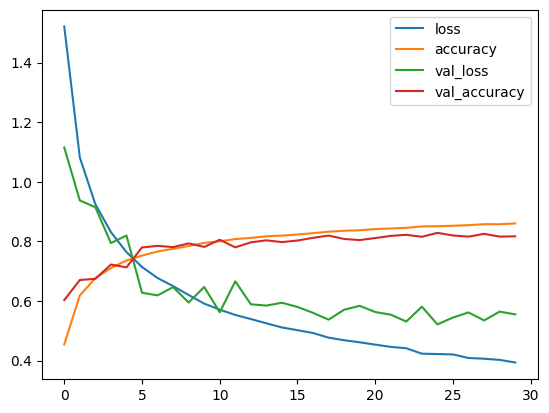

In [22]:
pd.DataFrame(result.history).plot()

Fix Overfitting:
1. Use more data : If we don't have more data, we can use 'data augmentation'
2. Droup Out:We turn off a few neurons randomly so that the remaining neurons don't get lazy and learn. Next time, it turns off a few more neurons.
3. Batch Normalization : The output of each layer is first normalized before entering the next layer

In [23]:
model.save('CNN_cifar10.h5_1')

In [25]:
my_model = load_model('CNN_cifar10.h5_1')

In [39]:
image_1 = my_model.predict(x_test_norm[0:20])[1]

1/1 [==============================] - 0s 19ms/step


In [40]:
image_1

array([8.7295091e-03, 2.0037033e-01, 1.0000764e-07, 1.8676840e-08,
       8.0657552e-09, 1.3805094e-09, 2.3083016e-08, 1.6685187e-09,
       7.9089522e-01, 4.8533329e-06], dtype=float32)

In [38]:
y_test_onehot[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [42]:
predictions = model.predict(x_test_norm)
print(predictions.shape)
predictions = np.argmax(predictions, axis = 1)
print(predictions)

313/313 [==============================] - 1s 3ms/step
(10000, 10)
[3 8 8 ... 5 1 7]


In [48]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 [==============================] - 1s 3ms/step


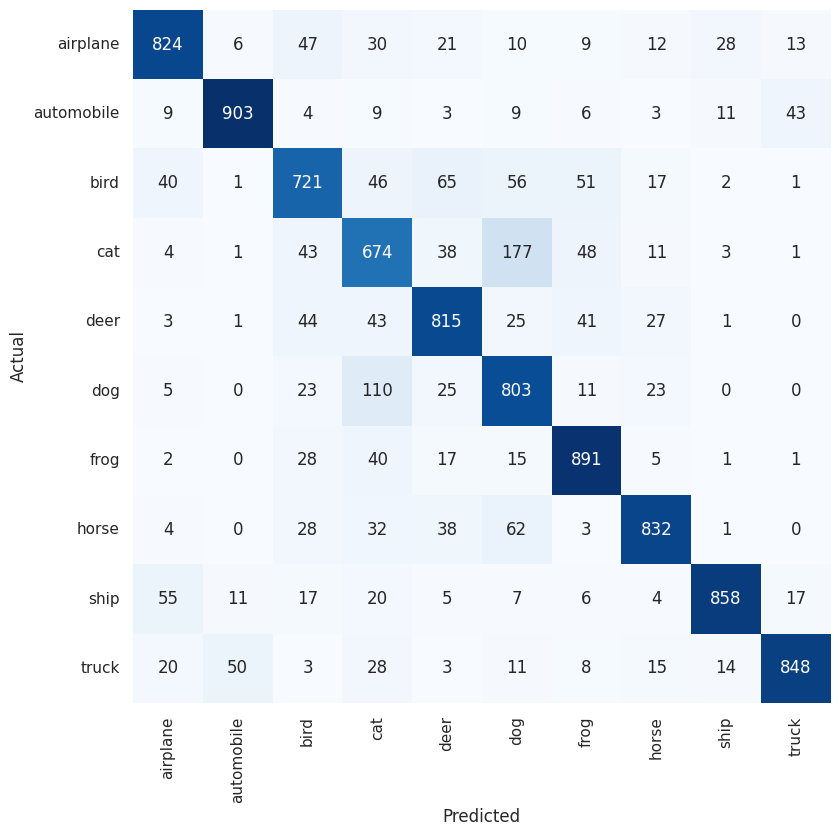

In [49]:
# Predicting test data
predictions = model.predict(x_test_norm)

predictions = np.argmax(predictions, axis = 1)

#y_test = np.argmax(y_test, axis = 1)


# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()